## Homework Week 2

### Set up the environment

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Getting the data
In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [3]:
!ls

In [4]:
!rm *.*

rm: cannot remove '*.*': No such file or directory


In [5]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 10:03:34--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-25 10:03:34 (18.1 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [6]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

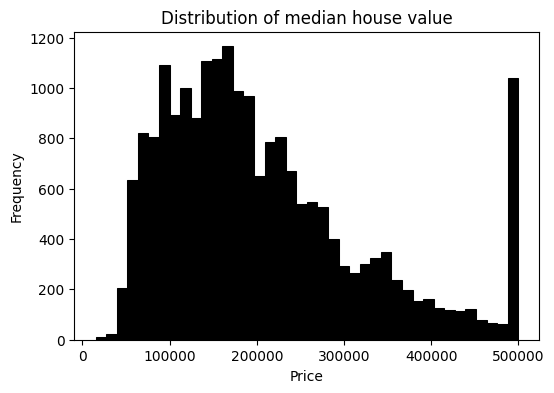

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df['median_house_value'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

plt.show()

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [8]:
df = df[(df['ocean_proximity'] == '<1H OCEAN')| 
        (df['ocean_proximity'] == 'INLAND')][['latitude',
                                                'longitude',
                                                'housing_median_age',
                                                'total_rooms',
                                                'total_bedrooms',
                                                'population',
                                                'households',
                                                'median_income',
                                                'median_house_value']]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [9]:
df['total_rooms'].isna().any()

False

In [10]:
df['total_bedrooms'].isna().any()

True

In [11]:
df['population'].isna().any()

False

In [12]:
df['households'].isna().any()

False

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [13]:
df['population'].median()

1195.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [14]:
# Size of dataset
n = len(df)

# train/val/test 60%/20%/20%
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# Set train, val and test datasets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

# Reset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Log transformation
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [15]:
# Function to train a linear regression
def train_linear_regression(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [16]:
# Function to calculate RMSE
def rmse(y_true, y_pred):
    error = y_true - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [17]:
# Replace missing values with zeroes
df_train['total_bedrooms'].fillna(0, inplace=True)
df_val['total_bedrooms'].fillna(0, inplace=True)
df_test['total_bedrooms'].fillna(0, inplace=True)

# Convert to numpy array
X_train = df_train.values

# Train linear regression model
w0, w = train_linear_regression(X_train, y_train, r=0)

# Create prediction
X_val = df_val.values
y_pred = w0 + X_val.dot(w)

# Calculate RMSE
round(rmse(y_val, y_pred), 2)

0.34

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [18]:
r_lst = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X_train = df_train.values
X_val = df_val.values
for r in r_lst:
    w0, w = train_linear_regression(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print (r, round(score, 2))

0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [19]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# List to collect RMSE scores
rmse_scores = []

for seed in seed_values:
    np.random.seed(seed)
    
    # train/val/test 60%/20%/20%
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    n_train = int(0.6 * len(df))
    n_val = int(0.2 * len(df))
    n_test = len(df) - n_train - n_val
    idx_train = idx[:n_train]
    idx_val = idx[n_train:n_train + n_val]
    idx_test = idx[n_train + n_val:]
    
    # Create dataframes for train, validation, and test sets
    df_train = df.iloc[idx_train]
    df_val = df.iloc[idx_val]
    df_test = df.iloc[idx_test]
    
    # Apply log transformation
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    # Remove median_house_value
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # Fill mission values with zeroes
    df_train['total_bedrooms'].fillna(0, inplace=True)
    df_val['total_bedrooms'].fillna(0, inplace=True)
    df_test['total_bedrooms'].fillna(0, inplace=True)
    
    # Convert dataframe to numpy arrays
    X_train = df_train.values
    X_val = df_val.values
    
    # Train a linear regression model without regularization
    w0, w = train_linear_regression(X_train, y_train, r=0)
    
    # Predict on the validation set
    y_pred = w0 + X_val.dot(w)
    
    # Calculate RMSE
    rmse_score = rmse(y_val, y_pred)
    
    # Append RMSE score to list
    rmse_scores.append(rmse_score)

# Calculate the standard deviation of RMSE scores
std_dev = np.std(rmse_scores)

# Round the standard deviation result to 3 decimal digits
round(std_dev, 3)

0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [20]:
np.random.seed(9)

# train/val/test 60%/20%/20%
idx = np.arange(len(df))
np.random.shuffle(idx)
n_train = int(0.6 * len(df))
n_val = int(0.2 * len(df))
n_test = len(df) - n_train - n_val
idx_train = idx[:n_train]
idx_val = idx[n_train:n_train + n_val]
idx_test = idx[n_train + n_val:]

# Create dataframe for train, validation, and test sets
df_train = df.iloc[idx_train]
df_val = df.iloc[idx_val]
df_test = df.iloc[idx_test]

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val], axis=0)

# Log transformation to median_house_value
y_train_val = np.log1p(df_train_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

# Remove median_house_value
del df_train_val['median_house_value']
del df_test['median_house_value']

# Fill missing values with zeroes
df_train_val['total_bedrooms'].fillna(0, inplace=True)
df_test['total_bedrooms'].fillna(0, inplace=True)

# Convert dataframes to numpy arrays
X_train_val = df_train_val.values
X_test = df_test.values

# Train a linear regression model
w0, w = train_linear_regression(X_train_val, y_train_val, r=0.001)

# Predict on the test set
y_pred_test = w0 + X_test.dot(w)

# Calculate RMSE on the test dataset
round(rmse(y_test, y_pred_test), 2)

0.33